<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.55


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=421fcc69d9c10ddc9e8ce15f7a27cc5f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbFVfS0drYnd5QU5ZVFEzaFNiYk5mTlhfcDg5cld3TDlYc2FnSFFUbXV1RUVSUDVSSGdPUkVTZnRTX2k2WU4ydyIsInN0YXRlIjoiNDIxZmNjNjlkOWMxMGRkYzllOGNlMTVmN2EyN2NjNWYifQ==


In [4]:
# https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
# Updated: https://drive.google.com/file/d/17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C/view?usp=sharing
drive_download(as_id('17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C'), path = paste0('/content/fia.csv'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.csv') %>% st_as_sf(coords = c("LON","LAT"), crs = 4326) %>% data.table

File downloaded:

• 2023_11_01FIA_soil_subset.csv <id: 17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C>

Saved locally as:

• /content/fia.csv



Reading layer `fia' from data source `/content/fia.csv' using driver `CSV'


Warning message:
“no simple feature geometries present: returning a data.frame or tbl_df”


In [5]:
# https://drive.google.com/file/d/1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ/view?usp=drive_link
drive_download(as_id('1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ'), path = "/content/250_summary_grid_dt.gpkg", overwrite = TRUE)
grid_dt <- st_read("/content/250_summary_grid_dt.gpkg") %>% st_transform(4326) %>% data.table()

File downloaded:

• 250_summary_grid_full_dt.gpkg <id: 1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ>

Saved locally as:

• /content/250_summary_grid_dt.gpkg



Reading layer `250_summary_grid_full_dt' from data source 
  `/content/250_summary_grid_dt.gpkg' using driver `GPKG'
Simple feature collection with 227561 features and 35 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 57161.36 ymin: 16952.32 xmax: 572661.4 ymax: 381202.3
Projected CRS: NAD_1983_HARN_StatePlane_Hawaii_1_FIPS_5101


In [6]:
print('hello')

[1] "hello"


In [7]:
# Simulation data
# https://drive.google.com/file/d/1HsEZDWJN7XO4aOZlMwbr_6MN3_-xUV81/view?usp=drive_link Run 1
drive_download(file = as_id('1HsEZDWJN7XO4aOZlMwbr_6MN3_-xUV81'), path =  '/content/sim_results_Hawaii_Run1.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/15tK1_k9FEGda5aL0P9SyRID-Xk0p_YuF/view?usp=drive_link Run 2
drive_download(file = as_id('15tK1_k9FEGda5aL0P9SyRID-Xk0p_YuF'), path =  '/content/sim_results_Hawaii_Run2.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1RrfNnsmy5ec0inSq35m_uEF3eskgcDDB/view?usp=drive_link Run 3
drive_download(file = as_id('1RrfNnsmy5ec0inSq35m_uEF3eskgcDDB'), path =  '/content/sim_results_Hawaii_Run3.gpkg', overwrite = TRUE)


File downloaded:

• sim_results_Hawaii_10000m_Run1.gpkg <id: 1HsEZDWJN7XO4aOZlMwbr_6MN3_-xUV81>

Saved locally as:

• /content/sim_results_Hawaii_Run1.gpkg

File downloaded:

• sim_results_Hawaii_10000m_Run2.gpkg <id: 15tK1_k9FEGda5aL0P9SyRID-Xk0p_YuF>

Saved locally as:

• /content/sim_results_Hawaii_Run2.gpkg

File downloaded:

• sim_results_Hawaii_10000m_Run3.gpkg <id: 1RrfNnsmy5ec0inSq35m_uEF3eskgcDDB>

Saved locally as:

• /content/sim_results_Hawaii_Run3.gpkg



In [8]:
sim_dt <- NULL
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3640446,194.5,6988805,373.3,6988805,373.3
Vcells,13565422,103.5,39123827,298.5,33319715,254.3


In [9]:
sim_1_dt <- st_read( '/content/sim_results_Hawaii_Run1.gpkg') %>% data.table
sim_2_dt <- st_read( '/content/sim_results_Hawaii_Run2.gpkg') %>% data.table
sim_3_dt <- st_read( '/content/sim_results_Hawaii_Run3.gpkg') %>% data.table

Reading layer `sim_results_Hawaii_10000m_Run1' from data source 
  `/content/sim_results_Hawaii_Run1.gpkg' using driver `GPKG'
Simple feature collection with 5600000 features and 74 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84
Reading layer `sim_results_Hawaii_10000m_Run2' from data source 
  `/content/sim_results_Hawaii_Run2.gpkg' using driver `GPKG'
Simple feature collection with 5600000 features and 74 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84
Reading layer `sim_results_Hawaii_10000m_Run3' from data source 
  `/content/sim_results_Hawaii_Run3.gpkg' using driver `GPKG'
Simple feature collection with 5600000 features and 74 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84


In [10]:
sim_dt <-list(sim_1_dt,sim_2_dt,sim_3_dt) %>% rbindlist()

In [11]:
grid_int_dt  <- fia_dt$geom %>% st_transform(4135) %>% st_buffer(10000) %>% st_transform(4326) %>% st_intersects(grid_dt$geom)

In [12]:
rm_vec <- grid_int_dt %>% lapply(length) %>% unlist > 0
grid_int_dt <- grid_int_dt[rm_vec]
fia_dt <- fia_dt[rm_vec,]

In [13]:
grid_dt <- grid_dt[!is.na(srad),]

In [14]:
grid_dt$agbd_n <- grid_dt$agbd_n %>% as.numeric

In [15]:
fia_dt$Stock_SOC_Mg_Ha <- fia_dt$Stock_SOC_Mg_Ha %>% as.numeric

Warning message in fia_dt$Stock_SOC_Mg_Ha %>% as.numeric:
“NAs introduced by coercion”


In [16]:
sim_dt %>% nrow

[1] 16800000

In [17]:
sim_dt[,z:=(predicted-Stock_SOC_Mg_Ha)/Stock_SOC_Mg_Ha]

In [18]:
sim_dt[,residual_per:=(predicted-Stock_SOC_Mg_Ha)/Stock_SOC_Mg_Ha]

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


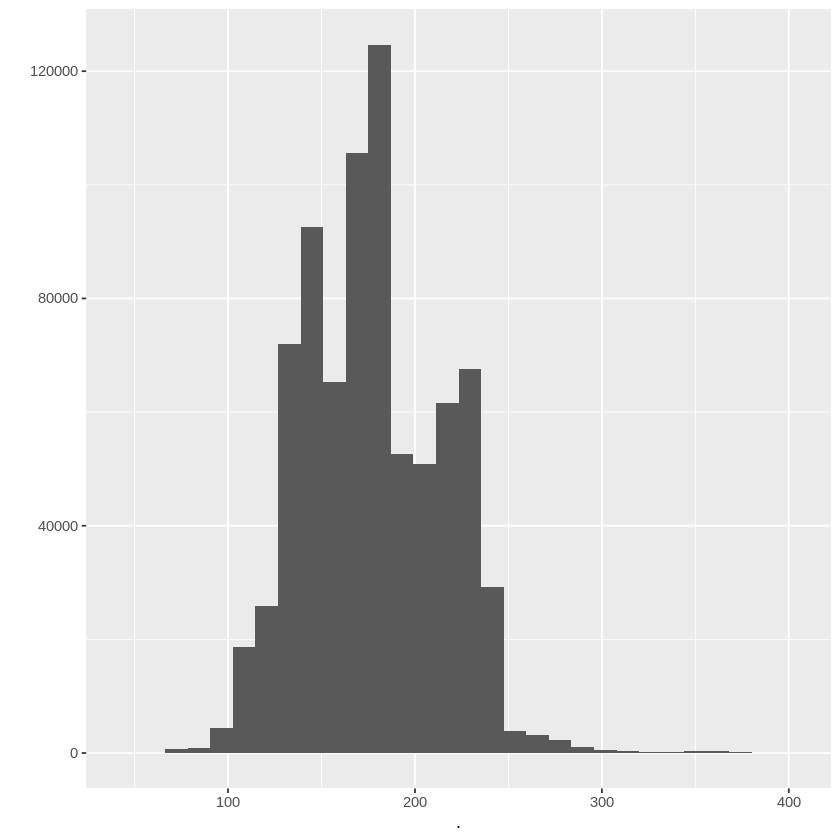

In [19]:
sim_dt[ z > -0.05 &z<0.05]$predicted %>% qplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


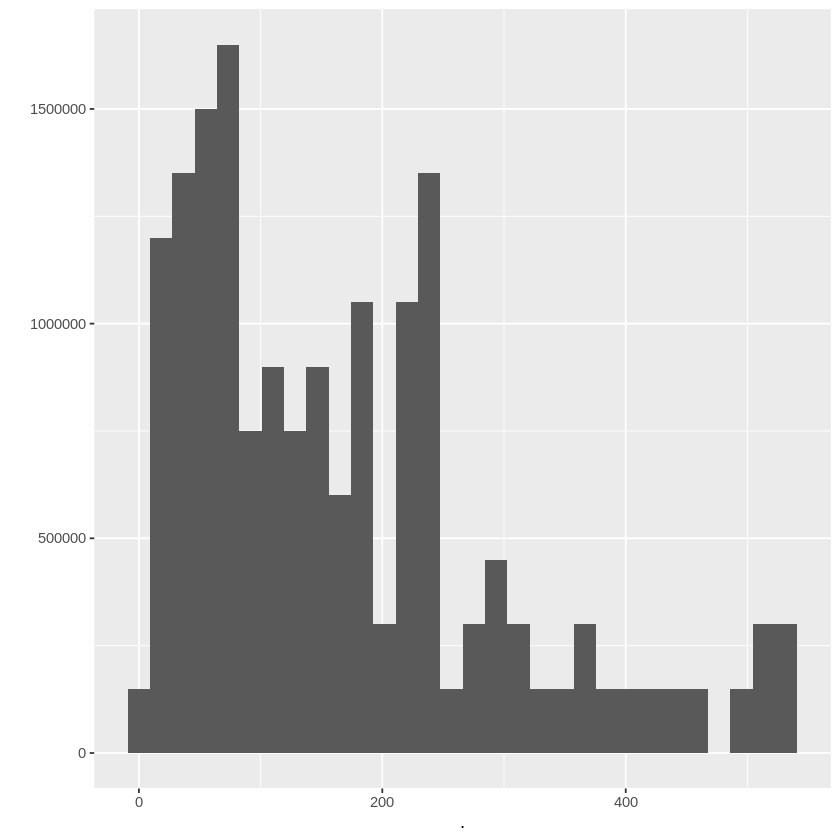

In [20]:
sim_dt$Stock_SOC_Mg_Ha %>% qplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


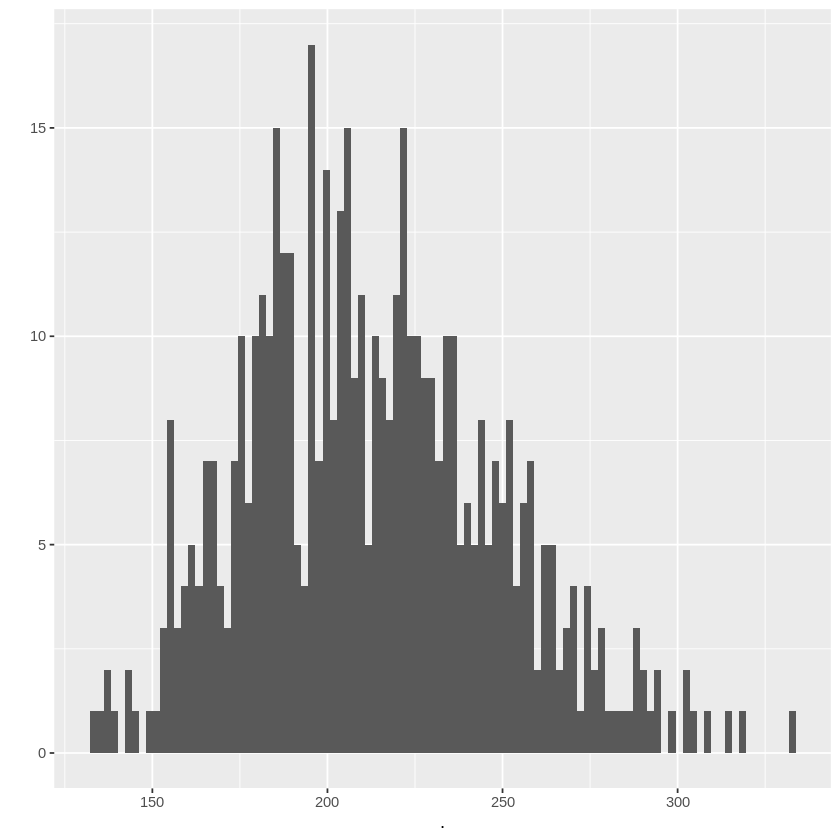

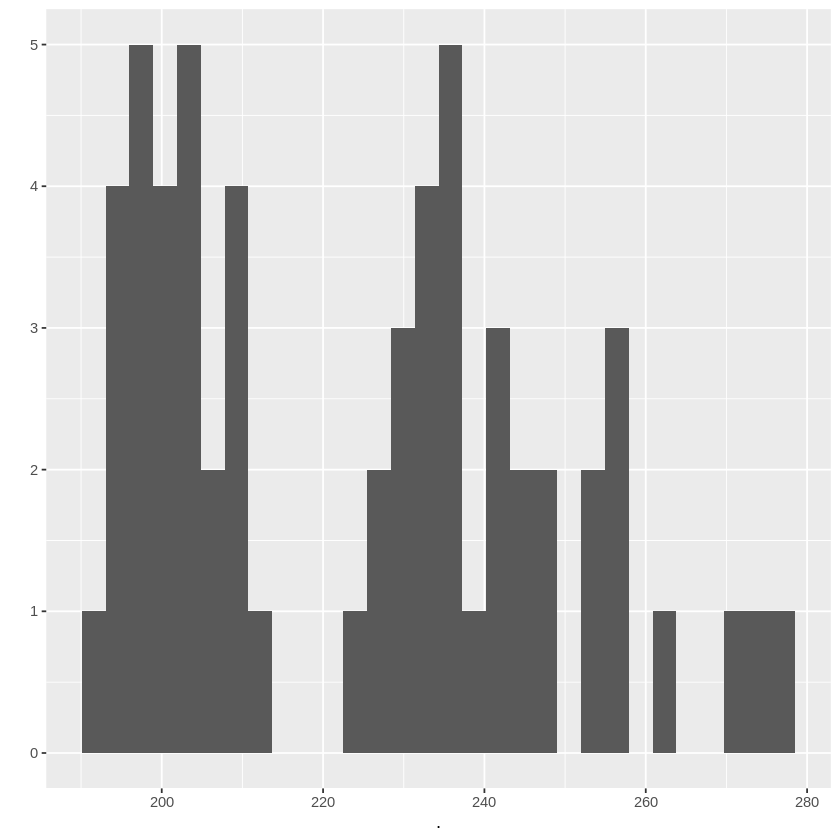

In [21]:
sim_dt[id==2831164]$predicted %>% qplot(bins=100)

sim_dt[id==2831164 & z > -0.05 &z<0.05]$predicted %>% qplot(geom='histogram')

In [22]:
sim_summary_dt <- sim_dt[,list(length = length(r2),length_05 = length(r2[sqrt((z)^2) <0.05]),geom=unique(geom)),by=.(id,PLOT)]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


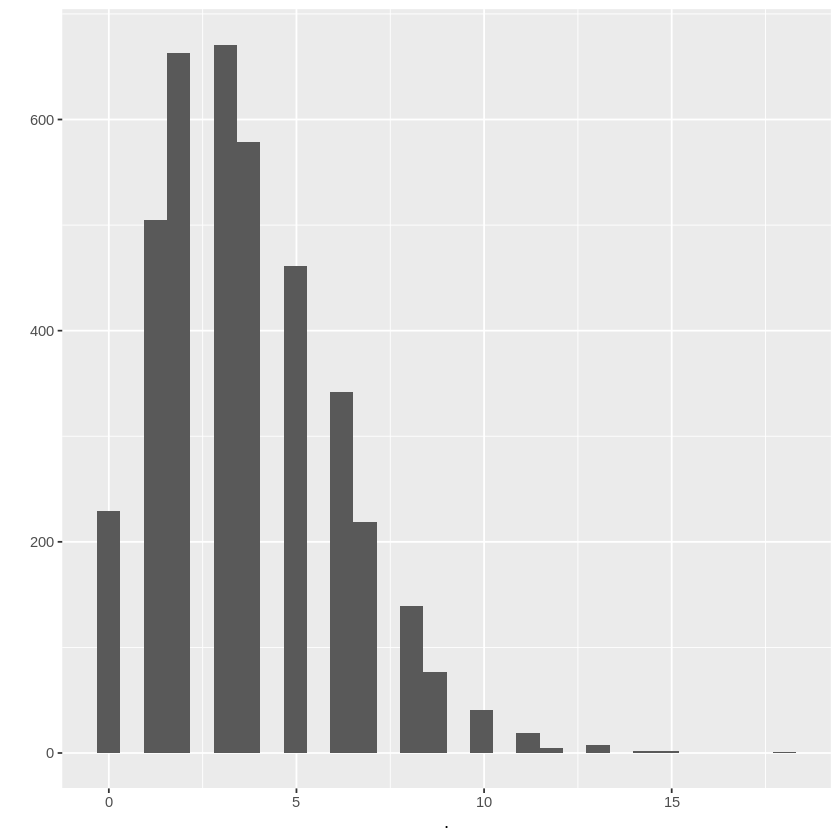

In [23]:
# sim_summary_dt
sim_summary_dt[PLOT==5289]$length_05 %>% qplot

In [24]:
sim_summary_dt %>% st_as_sf %>% st_write('sim_summary_id_plot.gpkg',delete_dsn = T)

writing: substituting ENGCRS["Undefined Cartesian SRS with unknown unit"] for missing CRS



Deleting source `sim_summary_id_plot.gpkg' failed
Writing layer `sim_summary_id_plot' to data source 
  `sim_summary_id_plot.gpkg' using driver `GPKG'
Writing 277039 features with 4 fields and geometry type Point.


In [44]:
(sim_dt %>% names)[c(9:18,20:37)]

[1] "water"              "trees"              "grass"             
 [4] "flooded_vegetation" "crops"              "shrub_and_scrub"   
 [7] "built"              "bare"               "snow_and_ice"      
[10] "elevation"          "SRTM_mTPI"          "aet"               
[13] "def"                "pdsi"               "pet"               
[16] "pr"                 "ro"                 "soil"              
[19] "srad"               "swe"                "tmmn"              
[22] "tmmx"               "vap"                "vpd"               
[25] "vs"                 "agbd_m"             "agbd_sd"           
[28] "agbd_n"

In [ ]:
sim_dt$id %>% sample(1)
sim_dt[id==2762315]$PLOT %>% table

In [ ]:
sim_dt[id==2762315] %>% nrow

In [ ]:
#  sim_dt[id==2762315 &PLOT == 2678]$z %>% abs %>% qplot

In [52]:
sim_dt[id==2762315 &PLOT == 2678 ]$id %>% unique

[1] 2762315

In [95]:
names(sim_dt)

[1] "PLOT"                       "Stock_SOC_Mg_Ha"           
 [3] "county_name"                "id"                        
 [5] "left"                       "top"                       
 [7] "right"                      "bottom"                    
 [9] "water"                      "trees"                     
[11] "grass"                      "flooded_vegetation"        
[13] "crops"                      "shrub_and_scrub"           
[15] "built"                      "bare"                      
[17] "snow_and_ice"               "elevation"                 
[19] "landform"                   "SRTM_mTPI"                 
[21] "aet"                        "def"                       
[23] "pdsi"                       "pet"                       
[25] "pr"                         "ro"                        
[27] "soil"                       "srad"                      
[29] "swe"                        "tmmn"                      
[31] "tmmx"                       "vap"                       
[33] "vpd"                        "vs"                        
[35] "agbd_m"                     "agbd_sd"                   
[37] "agbd_n"                     "majorcomposition"          
[39] "age_years"                  "age_class"                 
[41] "predicted"                  "var_imp_water"             
[43] "var_imp_trees"              "var_imp_grass"             
[45] "var_imp_flooded_vegetation" "var_imp_crops"             
[47] "var_imp_shrub_and_scrub"    "var_imp_built"             
[49] "var_imp_bare"               "var_imp_snow_and_ice"      
[51] "var_imp_elevation"          "var_imp_landform"          
[53] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[55] "var_imp_def"                "var_imp_pdsi"              
[57] "var_imp_pet"                "var_imp_pr"                
[59] "var_imp_ro"                 "var_imp_soil"              
[61] "var_imp_srad"               "var_imp_swe"               
[63] "var_imp_tmmn"               "var_imp_tmmx"              
[65] "var_imp_vap"                "var_imp_vpd"               
[67] "var_imp_vs"                 "var_imp_agbd_m"            
[69] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[71] "var_imp_majorcomposition"   "var_imp_age_years"         
[73] "var_imp_age_class"          "r2"                        
[75] "geom"                       "z"                         
[77] "residual_per"               "good"

In [332]:
names(sim_dt)[c(9:18,20:37)]

[1] "water"              "trees"              "grass"             
 [4] "flooded_vegetation" "crops"              "shrub_and_scrub"   
 [7] "built"              "bare"               "snow_and_ice"      
[10] "elevation"          "SRTM_mTPI"          "aet"               
[13] "def"                "pdsi"               "pet"               
[16] "pr"                 "ro"                 "soil"              
[19] "srad"               "swe"                "tmmn"              
[22] "tmmx"               "vap"                "vpd"               
[25] "vs"                 "agbd_m"             "agbd_sd"           
[28] "agbd_n"

In [336]:
p_value_dt <-
sim_dt$PLOT %>% unique %>% lapply(function(y){
names(sim_dt)[c(9:18,20:37)] %>%
lapply(function(x){
which_dt <- sim_dt[ PLOT == y ][,list(good = length(z[z < 0.05])/length(z) <0.02),by= .(PLOT,id)]
good_x <- grid_dt[id %in% which_dt$id[which_dt$good]][[x]]
bad_x <- grid_dt[id %in% which_dt$id[!which_dt$good]][[x]]
if(length(good_x)>3 &length(bad_x)>3){
p_value <- wilcox.test(good_x,bad_x)$p.value

data.table(PLOT=y,variable=x,p_value=p_value) %>% return
}else(return(data.table(PLOT=y,variable=x,p_value=NA)))
}) %>% rbindlist %>% return}) %>% rbindlist

In [341]:
p_value_dt

ERROR: ignored

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


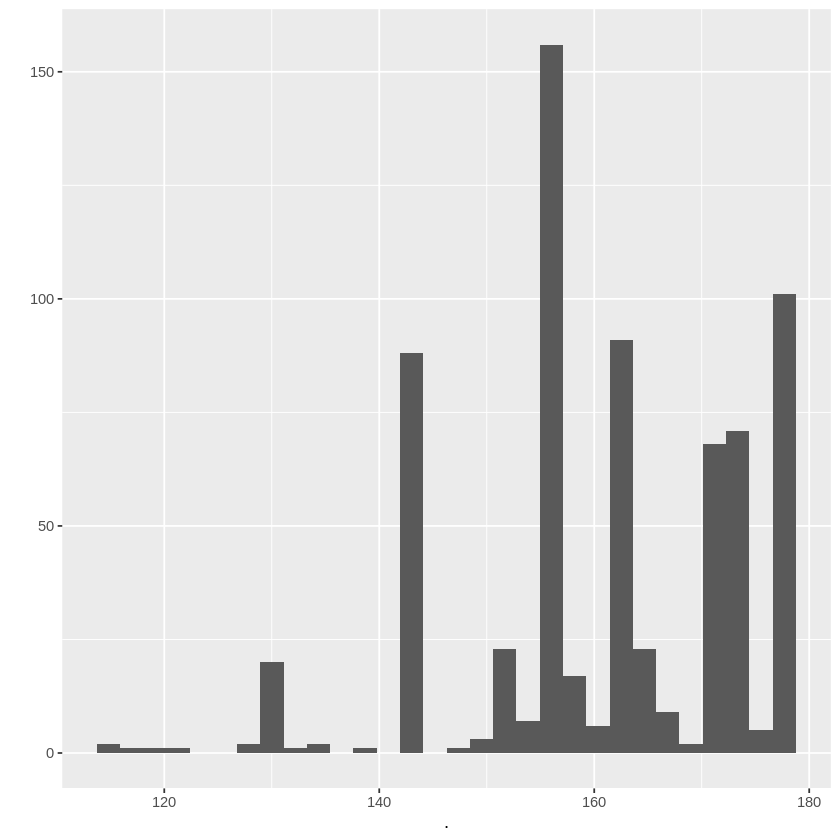

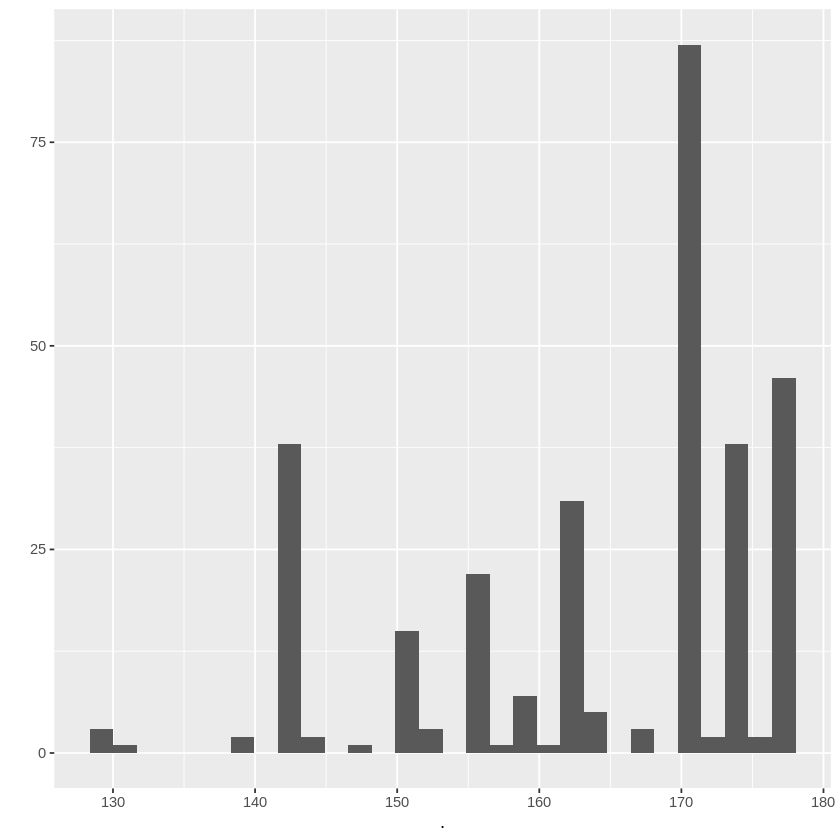

In [291]:
good_x %>% qplot
bad_x %>% qplot

In [266]:
x <- sim_dt[ PLOT == 2409 ][,list()]

z <- sim_dt[ PLOT == 2409 ]$z
length(x[abs(z) < 0.05])
length(x[abs(z) >= 0.05])
wilcox.test(sample(x[abs(z) < 0.05],1000,replace=T) %>% sort ,
          sample(x[abs(z) >= 0.05],1000,replace=T)%>% sort)

[1] 1836

[1] 148164


	Wilcoxon rank sum test with continuity correction

data:  sample(x[abs(z) < 0.05], 1000, replace = T) %>% sort and sample(x[abs(z) >= 0.05], 1000, replace = T) %>% sort
W = 467432, p-value = 0.01167
alternative hypothesis: true location shift is not equal to 0


In [268]:
x <- sim_dt[ PLOT == 2409 ]$elevation
z <- sim_dt[ PLOT == 2409 ]$z
t.test(x[abs(z) < 0.05],
          x[abs(z) >= 0.05])


	Welch Two Sample t-test

data:  x[abs(z) < 0.05] and x[abs(z) >= 0.05]
t = -4.0689, df = 1890.9, p-value = 4.918e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -43.40820 -15.17214
sample estimates:
mean of x mean of y 
 1257.762  1287.053 


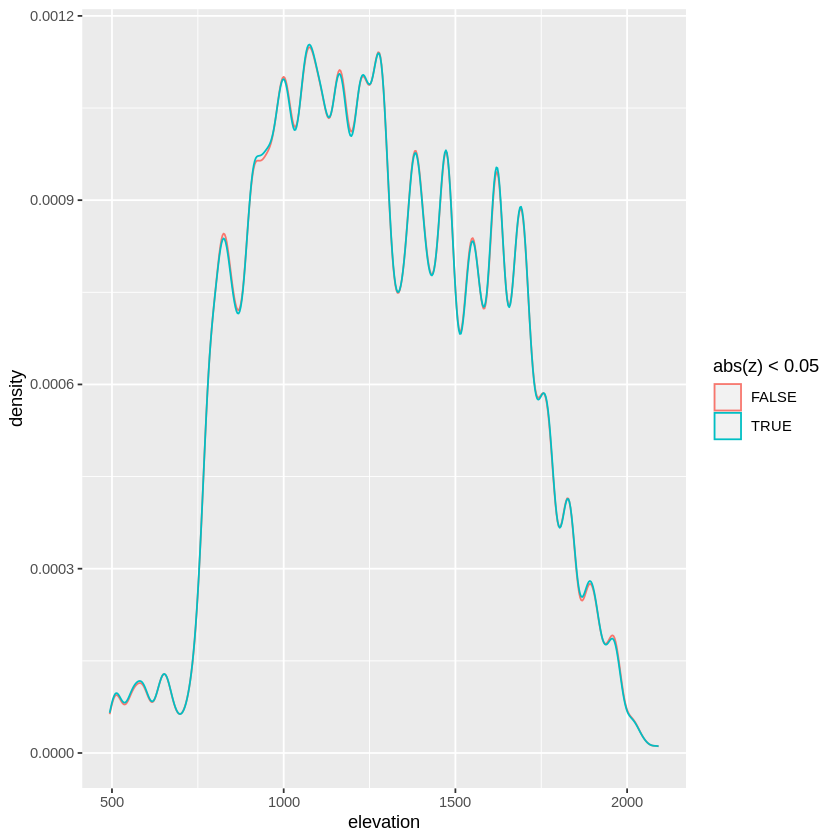

In [269]:
#  sim_dt[ PLOT == 2409 ] %>%
 data.table(elevation = c(sample(x[abs(z) < 0.05],1000000,replace=T),sample(x[abs(z) >= 0.05],1000000,replace=T)),z = c(rep(0,1000),rep(1,1000))) %>%
   ggplot(aes(x=elevation,group = abs(z) <0.05))+
     geom_density(aes(color= abs(z) <0.05))

In [96]:


if(length(x[abs(z) < 0.05])>3 &length(x[abs(z) >= 0.05])>3 ){
  t.test(x[abs(z) < 0.05],
          x[abs(z) >= 0.05])$p.value
          }else(return(NA))

[1] 6.548888e-06

In [320]:
sim_dt[, good := length(z[z < 0.05])/length(z) <0.02,by= .(PLOT,id)]

In [316]:
# table(sim_dt[ PLOT == 2409 ]$id,sim_dt[ PLOT == 2409 ]$good)

In [323]:
 var_imp_dt<- sim_dt[id %>% unique %>% length >60][
  , .(p_value = lapply(.SD, function(x) {
    if((length(x[good])>30 &length(x[!good])>30 ) & (mean(x[good])!=mean(x[!good]))){


      wilcox.test(good_x,bad_x)


      wilcox.test(x[good],
             x[!good])$p.value
             }else(return(NA))

    }) ,
      variable = names(sim_dt)[c(9:18,20:37)])
  , by = .( PLOT)
  , .SDcols = c(c(9:18,20:37))
]

var_imp_dt$p_value <- var_imp_dt$p_value %>% unlist

In [324]:
var_imp_dt

PLOT,p_value,variable
<chr>,<dbl>,<chr>
2159,NA,water
2159,NA,trees
2159,NA,grass
2159,NA,flooded_vegetation
2159,NA,crops
2159,NA,shrub_and_scrub
2159,NA,built
2159,NA,bare
2159,NA,snow_and_ice


In [ ]:
grid_dt %>% names

In [342]:
# out_dt <- data.table(var_imp_dt,sim_summary_dt[match(var_imp_dt$id,sim_summary_dt$id)])
out_dt <- data.table(p_value_dt,fia_dt[,c('geometry')][match(var_imp_dt$PLOT,fia_dt$PLOT)])

In [343]:
out_dt[,bonferroni:=p_value*length(c(9:18,20:37))]

In [344]:
out_dt$p_value <- out_dt$p_value %>% unlist

In [345]:
out_dt[PLOT==4791 &bonferroni <0.2][,list(p_value = mean(p_value)),by=variable]

variable,p_value
<chr>,<dbl>


In [ ]:
# short_out_dt[!is.na(var_imp_aet),]

In [346]:
short_out_dt <- dcast(out_dt,  PLOT ~ variable,value.var='bonferroni', drop=FALSE)
# short_out_dt <-short_out_dt[!is.na(trees),]

In [347]:
short_out_dt

PLOT,SRTM_mTPI,aet,agbd_m,agbd_n,agbd_sd,bare,built,crops,def,⋯,soil,srad,swe,tmmn,tmmx,trees,vap,vpd,vs,water
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2159,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2167,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2191,1.983122e-06,12.448111,1.933227e-59,17.6121783,2.217383e-51,1.019437e-53,1.986086e-32,3.343159e-15,1.907907e-08,⋯,3.125969e-12,7.702718e-09,NaN,9.720454e-11,2.931833e-12,2.183061e-14,8.837099e-13,1.015311e-10,1.652706e-08,27.88444
2204,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2208,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2212,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2230,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2237,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2242,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [90]:
good_set <- out_dt[,list(bonferroni_20 = mean(bonferroni[bonferroni<.2],na.rm=T),n=length(bonferroni[bonferroni<.05])),by = .(PLOT,variable)][!is.na(bonferroni_20)]$PLOT %>% unique

In [92]:
# fia_dt[PLOT %in% good_set] %>%
#   ggplot(aes(x=Stock_SOC_Mg_Ha))+
#   geom_histogram()

In [ ]:
fia_dt[PLOT %in% good_set]$Stock_SOC_Mg_Ha %>% mean(na.rm=T)

In [ ]:
fia_dt %>%
  ggplot(aes(x=Stock_SOC_Mg_Ha))+
  geom_histogram()

In [348]:
short_out_dt <- data.table(short_out_dt,fia_dt[,c('geometry')][match(short_out_dt$PLOT,fia_dt$PLOT)])

In [351]:
short_out_dt %>% st_as_sf %>% st_write('bonferroni_adj.gpkg',delete_dsn = T)

Deleting source `bonferroni_adj.gpkg' using driver `GPKG'
Writing layer `bonferroni_adj' to data source 
  `bonferroni_adj.gpkg' using driver `GPKG'
Writing 112 features with 29 fields and geometry type Point.


In [ ]:
cols_to_consider <- names(short_out_dt)[]


# Assuming 'short_out_dt' is your data.table
# Define the columns you want to consider for finding the max value by their indices
cols_to_consider_indices <- 3:(ncol(short_out_dt)-1) # Replace with actual indices of Var3, Var5, Var7
short_out_dt$max_col <-
1:nrow(short_out_dt) %>% lapply(function(x){
if(is.na(short_out_dt[x,cols_to_consider_indices,with=F] %>% unlist) %>% all){return(NA)}
short_out_dt[x,cols_to_consider_indices,with=F] %>% unlist %>% which.min( ) %>% names}) %>% unlist

In [ ]:
short_out_dt %>% st_write('max_col_p.gpkg')

In [ ]:
short_out_dt

In [ ]:
short_out_dt %>%
  ggplot(aes(x=1:nrow(short_out_dt),y=soil))+
  geom_line()

In [ ]:
out_dt[bonferroni <= .05]$variable %>% table

In [ ]:
out_dt[bonferroni<= 0.1] %>%
  ggplot(aes(x= variable %>% factor))+
  geom_bar()
  # geom_smooth(method='lm')

In [ ]:
data.table(out_dt) %>% st_as_sf() %>% st_write('/content/plot_sig_variables.gpkg',delete_dsn=T)

In [ ]:
# sim_dt[id ==2222069  ]
# 1850844
# sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05
sim_dt[id ==2952969  & sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05] %>%
  ggplot(aes(x=Stock_SOC_Mg_Ha)) +
  geom_histogram()
  # print()

In [ ]:
sim_dt %>%
  ggplot(aes(y=Stock_SOC_Mg_Ha,x=r2))+
    geom_bin2d()
    # geom_smooth()

In [ ]:
# Load the necessary library
library(repr)

# Adjust width and height of plots
options(repr.plot.width=20, repr.plot.height=8)